<a href="https://colab.research.google.com/github/panimesh14/Bayesian-Learning-and-Simulation/blob/main/Markov_Chain_Monte_Carlo_Simulations%3A_Metropolis_and_Metropolis_Hastings_Algorithm_for_Sampling_Probability_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Markov Chain Monte Carlo (MCMC): Metropolis and Metropolis Hastings Algorithm for Simulations

In [109]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [110]:
#Function for approximation 
def f1(x,a=10,b=0):
    #y=np.array(x.shape);
    #for i,j in x:
    #if((x<=a)&(x>b)):
    y=np.exp(-(x/20)**(2));
    #else:
    #   y=0;
    #y=sp.stats.binom.pmf(x,10,0.5,loc=0)
    return y

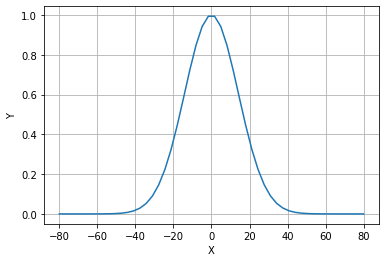

In [120]:
x=np.linspace(-80,80);
fn1=[f1(i) for i in x];
plt.plot(x,(fn1))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

#Simple Metropolis Algorithm

In [112]:
#Using Normal Distribution for approximation of function pdf
def norm_sim(N,sigma,burn_in=0.30):
    dist_samples=[5];
    i=0;
    count=0;#rejection count
    while(i<=N):#N candidates accepted
       new_candidate=np.random.normal(dist_samples[-1],sigma);
       rf=(f1(new_candidate)/(f1(dist_samples[-1])));
       accept_prob=min(1,abs(rf));#Acceptance probability as per Metropolis Algorithm
       u=np.random.normal(0,1);
       if(u<accept_prob):#Selection_criteria
          dist_samples.append(new_candidate);
          i=i+1;
       else:
          count=count+1;
    burn_in_num=int(burn_in*len(dist_samples));
    dist_samples=dist_samples[burn_in_num:];
    return dist_samples,count

In [121]:
y_m,count_m=norm_sim(100000,1)

Number of Rejections 20008


Text(0.5, 0, 'Random Variable')

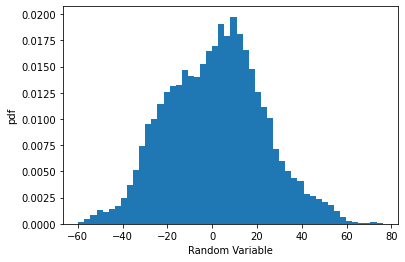

In [122]:
plt.hist(y_m,density=True,bins=50)
print('Number of Rejections',count_m)
plt.ylabel('pdf')
plt.xlabel('Random Variable')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


correlation coefficient 0.9989394026952422


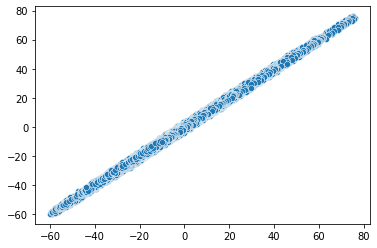

In [123]:
sns.scatterplot(y_m[:-1],y_m[1:])
r=sp.stats.pearsonr(y_m[:-1],y_m[1:])[0]
print('correlation coefficient',(r))
#High degree of correlation between samples
#Markov Chain dependence introduces the correlation

#Metropolis-Hastings Algorithm

In [124]:
#MH Algorithm
#Using Normal Distribution for approximation of function pdf
def norm_sim_mh(N,sigma,burn_in=0.30):
    dist_samples=[-2];
    i=0;
    count=0;#rejection count
    while(i<=N):#N candidates accepted
       new_candidate=np.random.normal(dist_samples[-1],sigma);
       rf=(f1(new_candidate)/f1(dist_samples[-1]));
       rg=(sp.stats.norm.pdf(dist_samples[-1],loc=new_candidate,scale=sigma)/sp.stats.norm.pdf(new_candidate,loc=dist_samples[-1],scale=sigma))
       accept_prob=min(1,abs(rf*rg));#Acceptance probability as per Metropolis Algorithm
       u=np.random.normal(0,1);
       if(u<=accept_prob):#Selection_criteria
          dist_samples.append(new_candidate);
          i=i+1;
       else:
          count=count+1;
    burn_in_num=int(burn_in*len(dist_samples));
    dist_samples=dist_samples[burn_in_num:]
    return dist_samples,count

In [125]:
y_mh,count_mh=norm_sim_mh(100000,1)

Number of Rejections 20237


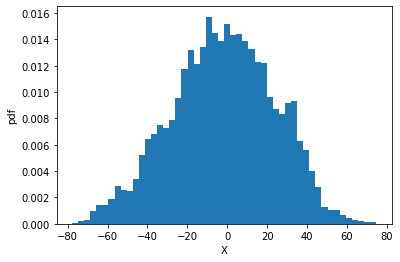

In [126]:
plt.hist(y_mh,density=True,bins=50)
plt.xlabel('X')
plt.ylabel('pdf')
print('Number of Rejections',count_mh)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


correlation coefficient 0.9992527745102233


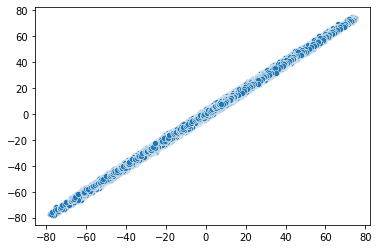

In [127]:
sns.scatterplot(y_mh[:-1],y_mh[1:])
r=sp.stats.pearsonr(y_mh[:-1],y_mh[1:])[0]
print('correlation coefficient',(r))
#High correlation between Samples
#High correlation induced by Markov Chain sampling relation introducing dependence 
#Higher correlation than Simple Metropolis Algorithm

In [ ]:
count_mh/count_m#Rejected samples ratio of MH vs simple metropolis algorithm

#####Markov Chains,as by nature, introduces heavy inter-correlation between successive samples.
#####Both algorithms seem to mimic the distribution at large and the spikyness can be reduced by increasing samples or with change in bins maybe. 
#####Number of rejections for both algorithms are also comparable at ~1.0114 and around equal although Metropolis Hastings with an extra criteria has more rejections and with increase in number of samples, the difference would become more visible probably.